In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

MessageError: ignored

In [ ]:
dataFrame=dataFrame[['Label','Text']]
dataFrame

,Label,Text
0,0.0,is upset that he can't update his Facebook by ...
1,NaN,@Kenichan I dived many times for the ball. Man...
2,0.0,my whole body feels itchy and like its on fire
3,0.0,"@nationwideclass no, it's not behaving at all...."
4,NaN,@Kwesidei not the whole crew
...,...,...
7199,4.0,"Back home, thought I'd done for the week, but ..."
7200,4.0,My GrandMa is making Dinenr with my Mum
7201,4.0,Mid-morning snack time... A bowl of cheese noo...
7202,4.0,@ShaDeLa same here say it like from the Termi...


In [ ]:
#loc indexer of the DataFrame to select rows where the value in the 'Label' column is equal to 4 and assigns it to 1 to deal the binary classsification problem in the binary representation (0 and 1)
dataFrame.loc[dataFrame['Label'] == 4, 'Label'] = 1

NameError: ignored

In [ ]:
dataFrame

,Label,Text
0,0.0,is upset that he can't update his Facebook by ...
1,NaN,@Kenichan I dived many times for the ball. Man...
2,0.0,my whole body feels itchy and like its on fire
3,0.0,"@nationwideclass no, it's not behaving at all...."
4,NaN,@Kwesidei not the whole crew
...,...,...
7199,1.0,"Back home, thought I'd done for the week, but ..."
7200,1.0,My GrandMa is making Dinenr with my Mum
7201,1.0,Mid-morning snack time... A bowl of cheese noo...
7202,1.0,@ShaDeLa same here say it like from the Termi...


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

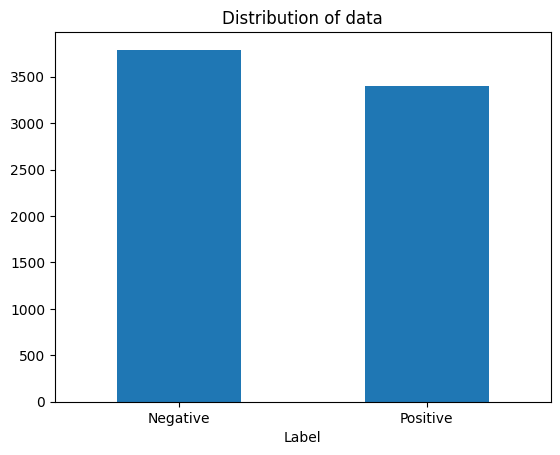

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = dataFrame.groupby('Label').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [ ]:
misingData=dataFrame.Label.mode()
misingData

0    0.0
Name: Label, dtype: float64

In [ ]:
dataFrame.Label=dataFrame.Label.fillna(0.0)


<ipython-input-115-fe5eabd5e23e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame.Label=dataFrame.Label.fillna(0.0)


In [ ]:
dataFrame

,Label,Text
0,0.0,is upset that he can't update his Facebook by ...
1,0.0,@Kenichan I dived many times for the ball. Man...
2,0.0,my whole body feels itchy and like its on fire
3,0.0,"@nationwideclass no, it's not behaving at all...."
4,0.0,@Kwesidei not the whole crew
...,...,...
7199,1.0,"Back home, thought I'd done for the week, but ..."
7200,1.0,My GrandMa is making Dinenr with my Mum
7201,1.0,Mid-morning snack time... A bowl of cheese noo...
7202,1.0,@ShaDeLa same here say it like from the Termi...


In [ ]:
# Defining emojis meaning
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
          # Defining english stop words
          #This list contains common English stopwords, which are words that are often considered insignificant or do not carry much meaning in natural language processing tasks.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']


In [ ]:
text, label = list(dataFrame['Text']), list(dataFrame['Label'])

def preprocess(textdata):
    processedText = []

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
         # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
          if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                 word = wordLemm.lemmatize(word)
                 tweetwords += (word+' ')

        processedText.append(tweetwords)

    return processedText

In [ ]:
pip install nltk


In [ ]:
import nltk


In [ ]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

processedtext = preprocess(text)
print(f'Text Preprocessing complete.')

Text Preprocessing complete.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, label,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
X_train_vectorized = vectoriser.fit_transform(X_train)

print('Vectoriser fitted.')


Vectoriser fitted.


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [ ]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
y_pred = BNBmodel.predict(X_test)


In [ ]:
score = BNBmodel.score(X_test, y_test)
print(f"Model score: {score}")


Model score: 0.6509695290858726


In [ ]:
from sklearn.dummy import DummyClassifier

# Create a ZeroR classifier
zeroR_model = DummyClassifier(strategy="most_frequent")

# Fit the ZeroR model on the training data
zeroR_model.fit(X_train, y_train)

# Predict using the trained ZeroR model
y_pred = zeroR_model.predict(X_test)


score = zeroR_model.score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score:", score)


Accuracy Score: 1.0


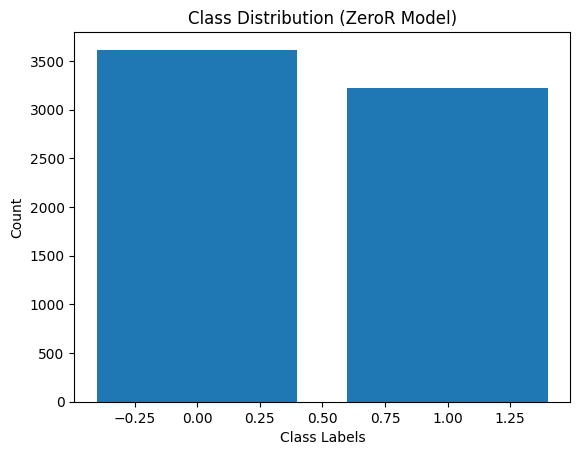

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each class label in the training data
class_counts = np.bincount(y_train)

# Get the unique class labels
class_labels = np.unique(y_train)

# Plot the class distribution
plt.bar(class_labels, class_counts)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution (ZeroR Model)')
plt.show()


In [ ]:


# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the decision tree classifier on the training data
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

score = dt_classifier.score(X_test, y_test)
print(f"Model score: {score}")





Model score: 0.6121883656509696


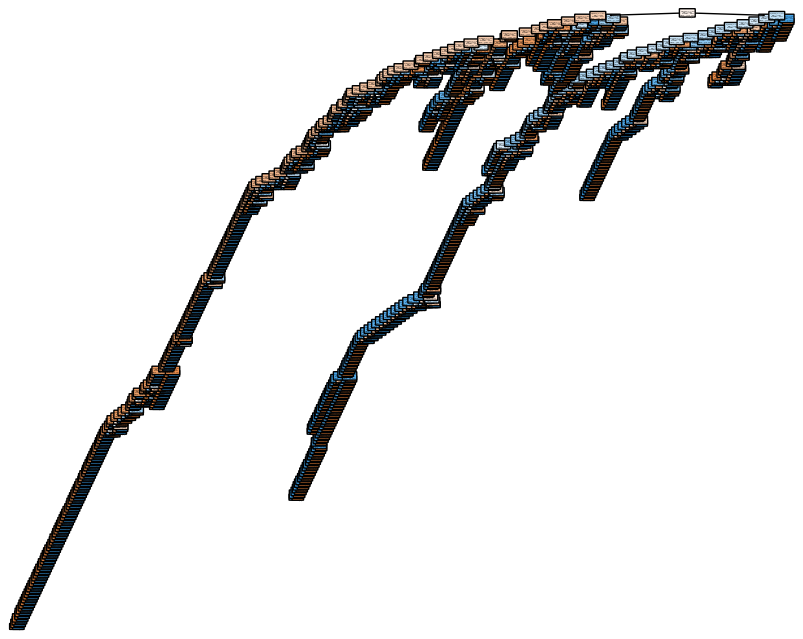

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt_classifier, filled=True, rounded=True, class_names=['Negative', 'Positive'])
plt.show()
